# Load data

In [1]:
import pandas as pd
import numpy as np


In [2]:
# load data
url = "https://raw.githubusercontent.com/nikhil-bhargava/ids-705-final-project/main/data/raw/worldcities.csv"
city = pd.read_csv(url)
data = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/raw/train.csv')
# df1 = pd.read_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/raw/test.csv')

In [3]:
from sklearn.model_selection import train_test_split

df, df1 = train_test_split(data, test_size=0.2)

In [4]:
# select relevant cities
city_df = city[city['id'].astype('str').isin(['1840034016', '1840020491', '1840000494', 
                                '1840006060', '1840000455', '1840021543'])]
city_df = city_df.rename(columns={'id':'city_id', 'city':'city_name'})
city_df['city_id'] = city_df['city_id'].astype('str')

In [5]:
bnb_city_id = {'NYC':'1840034016', 'SF':'1840021543', 'DC':'1840006060', 'LA':'1840020491', 'Chicago':'1840000494', 
               'Boston':'1840000455'}

df['city_id'] = df['city'].map(bnb_city_id)
df1['city_id'] = df1['city'].map(bnb_city_id)

<ipython-input-5-f4362b0359cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_id'] = df['city'].map(bnb_city_id)
<ipython-input-5-f4362b0359cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['city_id'] = df1['city'].map(bnb_city_id)


In [6]:
#city_df= city_df[['city_id', 'lat', 'lng']]

In [7]:
new_df = pd.merge(df, city_df, how='left', on='city_id')
new_df1 = pd.merge(df1, city_df, how='left', on='city_id')

In [8]:
pd.set_option('max.columns',200)

In [9]:
new_df.host_has_profile_pic = np.where(new_df.host_has_profile_pic=='t',1,0)
new_df.host_identity_verified = np.where(new_df.host_identity_verified=='t',1,0)
new_df.instant_bookable = np.where(new_df.instant_bookable=='t',1,0)
new_df.cleaning_fee = np.where(new_df.cleaning_fee=='True',1,0)


new_df1.host_has_profile_pic = np.where(new_df1.host_has_profile_pic=='t',1,0)
new_df1.host_identity_verified = np.where(new_df1.host_identity_verified=='t',1,0)
new_df1.instant_bookable = np.where(new_df1.instant_bookable=='t',1,0)
new_df1.cleaning_fee = np.where(new_df1.cleaning_fee=='True',1,0)

In [10]:
new_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,city_id,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population
0,13685207,5.686975,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,3.0,Real Bed,strict,0,LA,Fantastic Italian Villa in the heart of Hollyw...,2016-08-13,1,1,35%,2014-09-29,0,2017-04-23,34.109368,-118.330801,Whitley Manor: Historic Villa in Hollywood,Hollywood Hills,8,100.0,https://a0.muscache.com/im/pictures/eb1cbdac-f...,90068,3.0,3.0,1840020491,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12750807.0
1,14633924,5.298317,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,0,DC,Incredible neighborhood centrally located to a...,2017-01-22,1,0,100%,2015-08-01,0,2017-04-30,38.914214,-77.042810,Dupont North - garden entrance wBbq,NaN,7,100.0,https://a0.muscache.com/im/pictures/aa2f0697-c...,20009,0.0,1.0,1840006060,Washington,Washington,38.9047,-77.0163,United States,US,USA,District of Columbia,primary,5379184.0
2,11660575,3.891820,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",1,1.0,Real Bed,strict,0,NYC,The Apartment is located in the good area. 5 m...,2015-03-15,1,1,100%,2015-01-07,0,2017-09-14,40.702133,-73.914724,"Private room in Brooklyn, Calico Cat in the ho...",Bushwick,29,97.0,https://a0.muscache.com/im/pictures/69461394/8...,11237,1.0,1.0,1840034016,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18713220.0
3,607316,4.595120,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,0,DC,"1 Bedroom Library Suite in Victorian home in ""...",2016-10-09,1,1,100%,2008-12-14,1,2017-04-24,38.915071,-77.026110,Grand Victorian Near White House,NaN,18,94.0,https://a0.muscache.com/im/pictures/bba412fd-f...,20001,1.0,1.0,1840006060,Washington,Washington,38.9047,-77.0163,United States,US,USA,District of Columbia,primary,5379184.0
4,3425041,4.430817,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,0,Chicago,Safe and Beautiful Chicago (Bridgeport Village...,2015-09-13,1,0,70%,2014-04-15,0,2016-08-01,41.833680,-87.657418,Beautiful furnished City Unit,Bridgeport,11,78.0,https://a0.muscache.com/im/pictures/97590743/2...,60608,2.0,2.0,1840000494,Chicago,Chicago,41.8373,-87.6862,United States,US,USA,Illinois,NaN,8604203.0


In [11]:
new_df.drop('iso3', axis=1, inplace=True)
new_df1.drop('iso3', axis=1, inplace=True)

In [12]:
new_df.drop('iso2', axis=1, inplace=True)
new_df1.drop('iso2', axis=1, inplace=True)

In [13]:
new_df.drop('city_ascii', axis=1, inplace=True)
new_df1.drop('city_ascii', axis=1, inplace=True)

# Feature Engineering

### Distance of Airbnb to city center

In [14]:
from geopy import distance

def dist_city_center(prop_lat, prop_lon, city_lat, city_lon):
    prop_coords = (prop_lat, prop_lon)
    city_coords = (city_lat, city_lon)
    dist = distance.great_circle(prop_coords, city_coords).kilometers
    return dist



In [15]:
new_df['cc_dist'] = new_df.apply(lambda x: dist_city_center(x.latitude, x.longitude, x.lat, x.lng), axis=1)

new_df1['cc_dist'] = new_df1.apply(lambda x: dist_city_center(x.latitude, x.longitude, x.lat, x.lng), axis=1)

In [16]:

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
#     m = km * 0.621371
    
    return km


In [17]:
# def num_close_airbnbs(y, df, dist_thresh):
#     df['cur_lat'] = y.latitude
#     df['cur_lon'] = y.longitude
#     df['rel_dist'] = haversine_np(df['cur_lon'], df['cur_lat'], df['longitude'], df['latitude'])
#     num_close = df[df['rel_dist']<=dist_thresh]
#     return len(num_close)-1

def num_close_airbnbs(y, df, dist_thresh):
    df['cur_lat'] = y.latitude
    df['cur_lon'] = y.longitude
    df['rel_dist'] = haversine_np(df['cur_lon'], df['cur_lat'], df['longitude'], df['latitude'])
    num_close = np.sum(np.where(df['rel_dist'] <= dist_thresh, 1, 0)) - 1
    return num_close

In [18]:
# takes ~20 mins to run
df = new_df.copy()
new_df['num_bnb_1km'] = new_df.apply(lambda y: num_close_airbnbs(y, df, 1), axis=1)

In [19]:
# takes ~6 mins to run
df1 = new_df1.copy()
new_df1['num_bnb_1km'] = new_df1.apply(lambda y: num_close_airbnbs(y, df1, 1), axis=1)

### Description Length

In [20]:
new_df['desc_len'] = new_df['description'].str.len()
new_df['name_len'] = new_df['name'].str.len()

new_df1['desc_len'] = new_df1['description'].str.len()
new_df1['name_len'] = new_df1['name'].str.len()

### Ratio of Bedrooms to bathrooms

In [21]:
new_df['bed_bath_ratio'] = round(new_df.bedrooms/new_df.bathrooms,2)

new_df1['bed_bath_ratio'] = round(new_df1.bedrooms/new_df1.bathrooms,2)

### How long has the host been hosting

In [22]:
new_df['today'] = '2021-04-01'

new_df1['today'] = '2021-04-01'

In [23]:
new_df['host_since'] = pd.to_datetime(new_df['host_since'])
new_df['today'] = pd.to_datetime(new_df['today'])
new_df['years_of_hosting'] = round(((new_df['today'] - new_df['host_since']).dt.days)/365,1)

new_df1['host_since'] = pd.to_datetime(new_df1['host_since'])
new_df1['today'] = pd.to_datetime(new_df1['today'])
new_df1['years_of_hosting'] = round(((new_df1['today'] - new_df1['host_since']).dt.days)/365,1)

### Years since last review (benchmark date = 2021-04-01)

In [24]:
new_df['last_review'] = pd.to_datetime(new_df['last_review'])
new_df['years_since_lastreview'] = round(((new_df['today'] - new_df['last_review']).dt.days)/365,1)

new_df1['last_review'] = pd.to_datetime(new_df1['last_review'])
new_df1['years_since_lastreview'] = round(((new_df1['today'] - new_df1['last_review']).dt.days)/365,1)

In [25]:
# Dropping the column I made to get the dates
new_df.drop('today', axis=1, inplace=True)

new_df1.drop('today', axis=1, inplace=True)

In [26]:
# null values generated because there is no 'last_review'
new_df.years_since_lastreview.isnull().sum()

new_df1.years_since_lastreview.isnull().sum()

3166

### Change % to float for column 'host_response_rate'

In [195]:
new_df['host_response_rate'] = new_df['host_response_rate'].str.rstrip('%').astype('float')

new_df1['host_response_rate'] = new_df1['host_response_rate'].str.rstrip('%').astype('float')


In [28]:
new_df.shape

(59288, 44)

### Column 'host_has_profile_pic', 'host_since', 'host_identity_verified' all has 203 missing values

In [29]:
# Let's change all nan values to 'f' (no profile pic, identity not verified)
new_df.loc[new_df['host_has_profile_pic'].isnull(), 'host_has_profile_pic'] = 'f'
new_df.loc[new_df['host_identity_verified'].isnull(), 'host_identity_verified'] = 'f'

new_df1.loc[new_df1['host_has_profile_pic'].isnull(), 'host_has_profile_pic'] = 'f'
new_df1.loc[new_df1['host_identity_verified'].isnull(), 'host_identity_verified'] = 'f'


### Encode 'thumbnail_url' column to 1 or 0 (if you have thumbnail then 1 else 0)

In [30]:
# we won't using this as dummy variable
new_df.thumbnail_url.nunique()


52690

In [31]:
# If the value is not null, then we assign 1, else 0
new_df.loc[new_df['thumbnail_url'].notnull(), 'thumbnail_url'] = 1

new_df1.loc[new_df1['thumbnail_url'].notnull(), 'thumbnail_url'] = 1

In [32]:
new_df.loc[new_df['thumbnail_url'].isnull(), 'thumbnail_url'] = 0

new_df1.loc[new_df1['thumbnail_url'].isnull(), 'thumbnail_url'] = 0

In [33]:
# Now we have either 1 or 0
new_df.thumbnail_url.unique()


array([1, 0], dtype=object)

### Drop duplicate rows

In [34]:
duplicate_rows_new_df = new_df[new_df.duplicated()]
print('number of duplicate rows:', duplicate_rows_new_df.shape)

#drop the duplicate rows
new_df = new_df.drop_duplicates()

new_df1 = new_df1.drop_duplicates()

number of duplicate rows: (0, 44)


### Missing values for bedrooms and bathrooms

In [35]:
# Since most of the airbnbs have 1 bedroom, i will impute the missing values with 1
new_df.bedrooms.value_counts()


1.0     39831
2.0      9086
0.0      5402
3.0      3432
4.0      1049
5.0       281
6.0        86
7.0        29
8.0        12
9.0         7
10.0        6
Name: bedrooms, dtype: int64

In [36]:
# Since most of the airbnbs have 1 bathroom, i will impute the missing values with 1
new_df.bathrooms.value_counts()


1.0    46480
2.0     6352
1.5     3077
2.5     1239
3.0      860
3.5      336
4.0      220
0.5      170
0.0      154
4.5       92
5.0       55
8.0       36
5.5       33
6.0       17
6.5        8
7.0        7
7.5        6
Name: bathrooms, dtype: int64

In [37]:
new_df.beds.value_counts()


1.0     36146
2.0     13356
3.0      5155
4.0      2436
5.0      1025
6.0       531
7.0       175
8.0       147
10.0       72
9.0        57
16.0       30
12.0       26
11.0       16
13.0        8
15.0        6
14.0        4
0.0         3
18.0        1
Name: beds, dtype: int64

In [38]:
new_df['bathrooms'].fillna(new_df['bathrooms'].mode()[0], inplace=True)
new_df['bedrooms'].fillna(new_df['bedrooms'].mode()[0], inplace=True)
new_df['beds'].fillna(new_df['beds'].mode()[0], inplace=True)

new_df1['bathrooms'].fillna(new_df1['bathrooms'].mode()[0], inplace=True)
new_df1['bedrooms'].fillna(new_df1['bedrooms'].mode()[0], inplace=True)
new_df1['beds'].fillna(new_df1['beds'].mode()[0], inplace=True)

### Number of Beds to bedroom ratio

In [39]:
new_df['bed_bath_ratio'] = round(new_df.bedrooms/new_df.bathrooms,2)

new_df1['bed_bath_ratio'] = round(new_df1.bedrooms/new_df1.bathrooms,2)

In [40]:
# There are null values in 'bed_bath_ratio' because there are houses with no bathrooms (campers, private rooms..)
# Replace null values in 'bed_bath_ratio' with 0
new_df.loc[new_df['bed_bath_ratio'].isnull(), 'bed_bath_ratio'] = 0.00

new_df1.loc[new_df1['bed_bath_ratio'].isnull(), 'bed_bath_ratio'] = 0.00

In [41]:
new_df.loc[new_df['bed_bath_ratio']==np.inf, 'bed_bath_ratio'] = 0.00

new_df1.loc[new_df1['bed_bath_ratio']==np.inf, 'bed_bath_ratio'] = 0.00

### Drop 'neighborhood', 'zipcode', 'lat', 'lng', 'description' and 'name'

In [42]:
new_df.drop('zipcode', axis=1, inplace=True)
new_df.drop('neighbourhood', axis=1, inplace=True)

new_df1.drop('zipcode', axis=1, inplace=True)
new_df1.drop('neighbourhood', axis=1, inplace=True)

In [43]:
new_df.drop('lat', axis=1, inplace=True)
new_df.drop('lng', axis=1, inplace=True)

new_df1.drop('lat', axis=1, inplace=True)
new_df1.drop('lng', axis=1, inplace=True)

In [44]:
new_df.drop('name', axis=1, inplace=True)

new_df1.drop('name', axis=1, inplace=True)

In [45]:
new_df.drop('description', axis=1, inplace=True)

new_df1.drop('description', axis=1, inplace=True)

### Drop bed_type, cancellation_policy, cleaning_fee (not in test)


In [46]:
new_df.drop('bed_type', axis=1, inplace=True)

new_df1.drop('bed_type', axis=1, inplace=True)

In [47]:
new_df.drop('cancellation_policy', axis=1, inplace=True)

new_df1.drop('cancellation_policy', axis=1, inplace=True)

In [48]:
new_df.drop('cleaning_fee', axis=1, inplace=True)

new_df1.drop('cleaning_fee', axis=1, inplace=True)

In [49]:
new_df.drop('capital', axis=1, inplace=True)

new_df1.drop('capital', axis=1, inplace=True)

In [50]:
new_df.drop('admin_name', axis=1, inplace=True)

new_df1.drop('admin_name', axis=1, inplace=True)

In [51]:
new_df.drop('population', axis=1, inplace=True)

new_df1.drop('population', axis=1, inplace=True)

In [52]:
new_df.drop('city_id', axis=1, inplace=True)

new_df1.drop('city_id', axis=1, inplace=True)

In [53]:
new_df.drop('latitude', axis=1, inplace=True)

new_df1.drop('latitude', axis=1, inplace=True)

In [54]:
new_df.drop('longitude', axis=1, inplace=True)

new_df1.drop('longitude', axis=1, inplace=True)

In [55]:
new_df.drop('country', axis=1, inplace=True)

new_df1.drop('country', axis=1, inplace=True)

In [56]:
new_df.drop('city', axis=1, inplace=True)

new_df1.drop('city', axis=1, inplace=True)

In [57]:
new_df.drop('city_name', axis=1, inplace=True)

new_df1.drop('city_name', axis=1, inplace=True)

## Amenities

In [58]:
def handle_entry(s):
    # remove curly brace
    s = s.strip('{').strip('}')
    s = s.lower()
    # split
    s_list = s.split(",")
    # remove extra quote
    for i, curr_s in enumerate(s_list):
        s_list[i] = s_list[i].strip('"')
    return s_list

In [59]:
new_df['amenities'] = new_df['amenities'].apply(lambda x: handle_entry(x))

new_df1['amenities'] = new_df1['amenities'].apply(lambda x: handle_entry(x))

In [60]:
amenity_dict = {'amenity_tv': ['cable tv','tv'], 
 'amenity_baby': ['baby bath','baby monitor', 'babysitter recommendations', 'changing table', 
                  "children’s books and toys", "children’s dinnerware", 'family/kid friendly',
                  'fireplace guards', 'crib', 'high chair', "pack ’n play/travel crib", 'table corner guards',
                  'outlet covers', 'stair gates'],
'amenity_bed': ['bed linens', "extra pillows and blankets",'firm mattress','firm matress','firm mattress'],
'amenity_accessibility': [' smooth pathway to front door','accessible-height bed','accessible-height toilet',
                          'disabled parking spot','fixed grab bars for shower & toilet','flat smooth pathway to front door',
                          'grab-rails for shower and toilet','ground floor access','handheld shower head',
                          'path to entrance lit at night','roll-in shower with chair','step-free access',
                          'well-lit path to entrance','wheelchair accessible','wide clearance to bed',
                          'wide clearance to shower & toilet','wide clearance to shower and toilet','wide doorway',
                          'wide entryway','wide hallway clearance'],
'amenity_aircondition': ['air conditioning'],
'amenity_bbqgrill': ['bbq grill'], 
'amenity_breakfast': ['breakfast'],
'amenity_buzzer_wireless_intercom':['buzzer/wireless intercom'],
'amenity_cleaning_bf_checkout': ['cleaning before checkout'],
'amenity_pets': ['cat(s)', 'dog(s)', 'other pet(s)', 'pets allowed', 'pets live on this property'],
'amenity_washer_dryer':['dryer','washer','washer / dryer'],
'amenity_ev_charger':['ev charger'],
'amenity_elevator':['elevator','elevator in building'],
'amenity_free_park':['free parking on premises','free parking on street'],
'amenity_game':['game console'],
'amenity_indoor_fireplace': ['indoor fireplace'],
'amenity_gym':['gym'],
'amenity_clothes':['iron', 'hangers'],
'amenity_essential':['essentials'],
'amenity_hot_water': ['hot water'],
'amenity_garden_backyard':['garden or backyard'],
'amenity_bathroom':['bath towel', 'hand or paper towel', 'toilet paper', 'hand soap', 'body soap', 
                    'bathtub', 'shampoo', 'bathtub with shower chair', 'hot tub', 'shampoo', 'hair dryer'],
'amenity_host_greet': ['host greets you'], 
'amenity_heating': ['heating'],
'amenity_kitchen': ['refrigerator', 'dishes and silverware', 'microwave', 'hot water kettle', 
                    'dishwasher', 'coffee maker', 'stove', 'oven', 'cooking basics'],
'amenity_lake': ['lake access'],
'amenity_work': ['laptop friendly workspace'],
'amenity_bedroom_lock': ['lock on bedroom door'],
'amenity_lockbox': ['lockbox', 'keypad'],
'amenity_longterm_stays': ['long term stays allowed'],
'amenity_luggage_dropoff': ['luggage dropoff allowed'],
'amenity_other': ['other'],
'amenity_paid_parking': ['paid parking off premises'],
'amenity_patio_balcony': ['patio or balcony'],
'amenity_wifi': ['pocket wifi', 'wireless internet', 'internet', 'ethernet connection', 'internet'],
'amenity_pool': ['pool'],
'amenity_privacy': ['private bathroom', 'private entrance', 'private living room', 'room-darkening shades'],
'amenity_safety': ['safety card', 'smart lock', 'smartlock', 'smoke detector', 
                   'fire extinguisher', 'first aid kit', 'window guards'],
'amenity_self_checkin': ['self check-in'],
'amenity_single_level_home': ['single level home'],
'amenity_smoking_allowed': ['smoking allowed'],
'amenity_suitable_for_events': ['suitable for events'],
'amenity_waterfront': ['waterfront'],
'amenity_window_guards': ['window guards'],
'amenity_self_checkin':['self check-in'],
'amenity_beach_essentials':['beach essentials'],
'amenity_beach_front':['beachfront'],
'amenity_doorman':['doorman','doorman entry'],
'amenity_24hour_checkin':['24-hour check-in']}

In [61]:
def ohe_amenities(amenity, x):
    if amenity in x:
        return 1
    else:
        return 0

In [62]:
for agroup in amenity_dict.keys():
    amenity_cols = amenity_dict[agroup]
    for amenity in amenity_cols:
        new_df[amenity] = new_df['amenities'].apply(lambda x: ohe_amenities(amenity, x))
    new_df[agroup] = new_df[amenity_cols].sum(axis=1)
    new_df = new_df.drop(columns=amenity_cols)
    new_df[agroup] = np.where(new_df[agroup] >= 1, 1, 0)

In [63]:
for agroup in amenity_dict.keys():
    amenity_cols = amenity_dict[agroup]
    for amenity in amenity_cols:
        new_df1[amenity] = new_df1['amenities'].apply(lambda x: ohe_amenities(amenity, x))
    new_df1[agroup] = new_df1[amenity_cols].sum(axis=1)
    new_df1 = new_df1.drop(columns=amenity_cols)
    new_df1[agroup] = np.where(new_df1[agroup] >= 1, 1, 0)

In [64]:
new_df = new_df.fillna(method='bfill')

new_df1 = new_df1.fillna(method='bfill')

In [65]:
new_df.first_review.isnull().sum()

1

In [66]:
new_df.last_review.isnull().sum()

1

In [67]:
new_df.host_since.isnull().sum()

0

In [68]:
new_df.host_response_rate.isnull().sum()

0

## One-hot-encoding

In [69]:
cate_vari = ['property_type','room_type']
for i in cate_vari:
    #train[i]=train[i].astype(str)
    new_df[i]=pd.Categorical(new_df[i])
    
    new_df1[i]=pd.Categorical(new_df1[i])

In [271]:
#one hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing column (label encoded values)
df_ohe = pd.DataFrame(enc.fit_transform(new_df[cate_vari]).toarray())
df_ohe.columns = enc.get_feature_names()

df1_ohe = pd.DataFrame(enc.fit_transform(new_df1[cate_vari]).toarray())
df1_ohe.columns = enc.get_feature_names()
# merge with main df bridge_df on key values
merged_df = new_df.join(df_ohe)
merged_df1 = new_df1.join(df1_ohe)

merged_df.drop(columns=cate_vari, inplace=True)
merged_df1.drop(columns=cate_vari, inplace=True)

In [272]:
merged_df.drop('id', axis=1, inplace=True)

merged_df1.drop('id', axis=1, inplace=True)

In [273]:
merged_df.drop('amenities', axis=1, inplace=True)

merged_df1.drop('amenities', axis=1, inplace=True)

In [274]:
merged_df.drop('first_review', axis=1, inplace=True)

merged_df1.drop('first_review', axis=1, inplace=True)

In [275]:
merged_df.drop('last_review', axis=1, inplace=True)

merged_df1.drop('last_review', axis=1, inplace=True)

In [276]:
merged_df.drop('host_since', axis=1, inplace=True)

merged_df1.drop('host_since', axis=1, inplace=True)

In [277]:
merged_df1.head()

,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Castle,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Loft,x0_Other,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Townhouse,x0_Train,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room
0,5.521461,3,1.0,1,0,100.0,0,2,100.0,1,1.0,1.0,7.899429,244,432,34,1.0,8.6,5.2,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.094345,1,1.0,1,0,100.0,1,2,100.0,1,1.0,1.0,27.620886,2,336,19,1.0,4.4,4.1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.382027,2,1.0,1,1,100.0,0,1,80.0,1,1.0,1.0,8.216672,13,1000,34,1.0,7.6,4.2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.043051,2,1.0,1,1,100.0,0,10,87.0,1,1.0,1.0,12.411142,209,1000,35,1.0,9.1,8.4,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.700480,2,2.0,1,1,100.0,0,0,97.0,1,1.0,1.0,5.229536,16,1000,47,0.5,7.8,4.0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
merged_df.columns

Index(['log_price', 'accommodates', 'bathrooms', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       ...
       'x0_Tipi', 'x0_Townhouse', 'x0_Train', 'x0_Treehouse',
       'x0_Vacation home', 'x0_Villa', 'x0_Yurt', 'x1_Entire home/apt',
       'x1_Private room', 'x1_Shared room'],
      dtype='object', length=105)

In [278]:
# create agent columns in test set that don't exist in train
mis_cols = list(set(merged_df.columns)-set(merged_df1.columns))
for col in mis_cols:
    merged_df1[col] = 0

In [279]:
merged_df1.head()

,log_price,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Castle,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Loft,x0_Other,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Townhouse,x0_Train,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room,x0_Tipi,x0_Island,x0_Treehouse,x0_Parking Space,x0_Lighthouse,x0_Cave,x0_Casa particular
0,5.521461,3,1.0,1,0,100.0,0,2,100.0,1,1.0,1.0,7.899429,244,432,34,1.0,8.6,5.2,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0
1,4.094345,1,1.0,1,0,100.0,1,2,100.0,1,1.0,1.0,27.620886,2,336,19,1.0,4.4,4.1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0
2,4.382027,2,1.0,1,1,100.0,0,1,80.0,1,1.0,1.0,8.216672,13,1000,34,1.0,7.6,4.2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0
3,4.043051,2,1.0,1,1,100.0,0,10,87.0,1,1.0,1.0,12.411142,209,1000,35,1.0,9.1,8.4,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0
4,4.700480,2,2.0,1,1,100.0,0,0,97.0,1,1.0,1.0,5.229536,16,1000,47,0.5,7.8,4.0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0


In [282]:
merged_df = merged_df.fillna(method='ffill')
test = merged_df1.fillna(method='ffill')

train, val = train_test_split(merged_df, test_size=0.2)

In [284]:
merged_df.isnull().any().sum()

0

In [286]:
test = merged_df1.fillna(0)

In [290]:
val.isnull().any().sum()

0

In [287]:
train.to_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/terminal_train.csv',index=False)
val.to_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/terminal_val.csv',index=False)
test.to_csv('/Users/guanlxy/Documents/github/ids-705-final-project/data/processed/terminal_test_us.csv',index=False)

In [291]:
y = merged_df.log_price
X = merged_df.drop(columns=['log_price'])

In [292]:
y_test_us = test.log_price
X_test_us = test.drop(columns=['log_price'])

In [182]:
X.dtypes

accommodates                          int64
bathrooms                           float64
host_has_profile_pic                  int64
host_identity_verified                int64
host_response_rate                  float64
instant_bookable                      int64
number_of_reviews                     int64
review_scores_rating                float64
thumbnail_url                         int64
bedrooms                            float64
beds                                float64
cc_dist                             float64
num_bnb_1km                           int64
desc_len                              int64
name_len                              int64
bed_bath_ratio                      float64
years_of_hosting                    float64
years_since_lastreview              float64
amenity_tv                            int64
amenity_baby                          int64
amenity_bed                           int64
amenity_accessibility                 int64
amenity_aircondition            

In [183]:
X.sample(20)

,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Casa particular,x0_Castle,x0_Cave,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Island,x0_Lighthouse,x0_Loft,x0_Other,x0_Parking Space,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Tipi,x0_Townhouse,x0_Train,x0_Treehouse,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room
31630,4,1.0,1,0,100.0,1,0,99.0,1,1.0,1.0,6.848572,1589,1000,50,1.0,5.0,3.6,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58284,2,1.0,1,0,100.0,0,0,90.0,1,1.0,1.0,30.172099,9,379,45,1.0,4.5,3.5,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34970,8,2.0,1,1,100.0,1,35,82.0,1,3.0,4.0,4.754271,111,1000,30,1.5,6.3,4.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24996,2,1.0,1,1,100.0,0,11,89.0,1,1.0,1.0,9.188402,184,1000,49,1.0,5.5,4.1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37086,7,1.0,1,1,100.0,0,20,97.0,1,3.0,5.0,7.020834,233,1000,48,3.0,4.8,3.5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35284,2,1.0,1,1,100.0,0,1,100.0,1,1.0,1.0,10.944916,129,370,25,1.0,7.4,5.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39285,2,1.0,1,1,90.0,0,1,100.0,1,1.0,1.0,0.831425,552,1000,35,1.0,6.7,4.6,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36710,2,1.0,1,0,100.0,0,0,92.0,1,1.0,1.0,14.717300,685,199,18,1.0,5.7,4.3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [213]:
#Standardization
X = (X - X.mean())/X.std()

In [214]:
X_test_us = (X_test_us - X_test_us.mean()) / X_test_us.std()

In [187]:
X

,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Casa particular,x0_Castle,x0_Cave,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Island,x0_Lighthouse,x0_Loft,x0_Other,x0_Parking Space,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Tipi,x0_Townhouse,x0_Train,x0_Treehouse,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room
0,1.319997,3.041327,0.074242,0.698647,-3.584373,-0.597607,-0.342631,0.750149,0.353624,2.044947,1.027652,-0.259730,-0.092605,-1.654671,0.756856,-0.058536,-0.112819,-0.228560,0.616340,-1.006388,-0.251156,-0.296128,-1.708444,-0.092871,2.809381,-0.545978,-0.060609,-0.561346,0.833606,-0.026306,-0.550298,-0.683832,-0.07946,2.644302,-0.335892,0.613345,0.396681,-0.247493,-0.124363,0.510159,-0.126582,0.323503,-0.263672,-0.014809,0.832851,1.765227,-0.361366,-0.153568,-0.151891,-0.05549,-0.01006,-0.129507,0.184902,-0.304043,-0.398388,0.420242,-0.418879,-0.083856,-0.228459,4.032955,-0.038991,-0.091943,-0.036061,-0.021345,-0.261028,1.700296,-1.395710,-0.080528,-0.029342,-0.031292,-0.071433,-0.031561,-0.034869,-0.004107,-0.014228,-0.005808,-0.008214,-0.192758,-0.04578,-0.007114,-0.039207,-0.082209,-0.029628,1.868362,-0.010866,-0.029912,-0.004107,-0.004107,-0.130513,-0.091476,-0.004107,-0.01837,-0.01643,-0.031828,-0.007114,-0.153395,-0.004107,-0.010866,-0.009184,-0.049685,-0.01006,0.891332,-0.840805,-0.1715
1,-0.536264,-0.403284,0.074242,-1.431315,0.345746,-0.597607,-0.368944,0.750149,0.353624,-1.487745,-0.564764,-0.765484,0.415099,0.748456,0.013521,-1.878582,-0.554619,-0.228560,0.616340,0.993636,-0.251156,-0.296128,0.585318,-0.092871,-0.355944,-0.545978,-0.060609,1.781402,0.833606,-0.026306,-0.550298,-0.683832,-0.07946,-0.378165,-0.335892,0.613345,0.396681,-0.247493,-0.124363,0.510159,-0.126582,0.323503,-0.263672,-0.014809,0.832851,-0.566490,-0.361366,-0.153568,-0.151891,-0.05549,-0.01006,-0.129507,0.184902,-0.304043,-0.398388,0.420242,-0.418879,-0.083856,-0.228459,-0.247953,-0.038991,-0.091943,-0.036061,-0.021345,-0.261028,-0.588123,0.716469,-0.080528,-0.029342,-0.031292,-0.071433,-0.031561,-0.034869,-0.004107,-0.014228,-0.005808,-0.008214,-0.192758,-0.04578,-0.007114,-0.039207,-0.082209,-0.029628,-0.535219,-0.010866,-0.029912,-0.004107,-0.004107,-0.130513,-0.091476,-0.004107,-0.01837,-0.01643,-0.031828,-0.007114,-0.153395,-0.004107,-0.010866,-0.009184,-0.049685,-0.01006,0.891332,-0.840805,-0.1715
2,-1.000330,-0.403284,0.074242,0.698647,0.345746,-0.597607,0.209942,0.370899,0.353624,-0.310181,-0.564764,-0.912346,0.570161,0.748456,1.606383,-0.058536,-0.278494,-0.856395,-1.622453,-1.006388,-0.251156,-0.296128,0.585318,-0.092871,-0.355944,1.831544,16.498848,1.781402,-1.199587,-0.026306,-0.550298,-0.683832,-0.07946,-0.378165,-0.335892,0

In [215]:
X.iloc[X.values==np.nan]

,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Casa particular,x0_Castle,x0_Cave,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Island,x0_Lighthouse,x0_Loft,x0_Other,x0_Parking Space,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Tipi,x0_Townhouse,x0_Train,x0_Treehouse,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room


In [225]:
from sklearn.model_selection import train_test_split

r_state = 2021

# Split into train/test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=r_state)

#### PCA

array([0.05515838, 0.09922586, 0.13097174, 0.15925139, 0.18406232,
       0.20398092, 0.22197109, 0.23686228, 0.25085835, 0.26434569,
       0.27720832, 0.289892  , 0.3024069 , 0.31480277, 0.32717996,
       0.33955256, 0.35187238, 0.36416331, 0.37613156, 0.38807809,
       0.39983043, 0.41134993, 0.42266604, 0.4337505 , 0.444602  ,
       0.45527278, 0.46585272, 0.47634928, 0.48680808, 0.49715845,
       0.50742254, 0.51760905, 0.52770186, 0.53775604, 0.54775819,
       0.55767546, 0.56757057, 0.5774378 , 0.58721084, 0.59695571,
       0.60663178, 0.61625511, 0.62586057, 0.63541065, 0.64486149,
       0.65429047, 0.66364835, 0.67299162, 0.6822516 , 0.69151109,
       0.70066362, 0.7097468 , 0.71864337, 0.72733494, 0.73597981,
       0.74451532, 0.75301761, 0.76143405, 0.76967174, 0.77787414,
       0.78600607, 0.7940153 , 0.80197416, 0.80989742, 0.81763972,
       0.82522873, 0.83274584, 0.84014187, 0.84752248, 0.85477622,
       0.86197301, 0.86898435, 0.87590136, 0.88262393, 0.88924

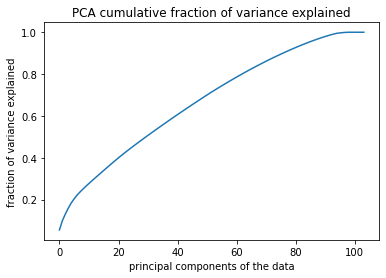

In [130]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#figure out how much dimension we need after pca
pca = PCA(n_components=X_train.shape[1])
pca_transform = pca.fit_transform(X_train,y_train)
var_values = pca.explained_variance_ratio_


cum_exp_variance = np.cumsum(var_values)
plt.plot(cum_exp_variance)
plt.xlabel('principal components of the data')
plt.ylabel('fraction of variance explained')
plt.title('PCA cumulative fraction of variance explained')

cum_exp_variance

## Model

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


## 1. Linear Regression

In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)


print('Train R^2', lr.score(X_train,y_train))
print('Val R^2', lr.score(X_val,y_val))

In [ ]:
mean_squared_error(y_train, lr.predict(X_train))

In [ ]:
y_pred_lr = lr.predict(X_val)
mean_squared_error(y_val, y_pred_lr)

## 2. KNN

In [132]:
# Reduce dimension to 2/5/15 with PCA
pca_2 = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=r_state))
pca_15 = make_pipeline(StandardScaler(), PCA(n_components=15, random_state=r_state))
pca_40 = make_pipeline(StandardScaler(), PCA(n_components=40, random_state=r_state))


In [133]:
# Make a list of the methods to be compared
dim_reduction_methods = [('PCA2', pca_2),('PCA15', pca_15),('PCA40', pca_40)]

In [134]:
y_train1 = np.exp(y_train)
y_val1 = np.exp(y_val)
y_test_us1 = np.exp(y_test_us)

In [135]:
from sklearn.metrics import mean_squared_error
import time
from sklearn.neighbors import KNeighborsRegressor
n_neighbors=5
knn = KNeighborsRegressor(n_neighbors=n_neighbors)

for i, (name, model) in enumerate(dim_reduction_methods):
    
    #start timer
    time0 = time.time()
    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)
    #time for training
    time1 = time.time()
    
    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_val), y_val)
    y_knn = knn.predict(model.transform(X_val))
    y_knn1 = np.exp(y_knn)
    mse_log = mean_squared_error(y_val, y_knn)
    mse = mean_squared_error(y_val1, y_knn1)
    #time for test
    time2 = time.time()
    
    err_median = np.abs(y_val1-y_knn1).median()
    err_mean = np.abs(y_val1-y_knn1).mean()
    
    print("{}, KNN (k={})\nTest score = {:.2f}".format(name,n_neighbors,acc_knn))
    print('RMSE (on log price):',np.sqrt(mse_log))
    print('RMSE (on normal price):',np.sqrt(mse))
    print('Mean Absolute Error:', err_mean)
    print('Median Absolute Error:', err_median)
    print('KNN ({}) training time = {}, prediction time ={}\n'.format(name,time1-time0,time2-time1))

PCA2, KNN (k=5)
Test score = 0.16
RMSE (on log price): 0.6553188587561161
RMSE (on normal price): 148.9506464519824
Mean Absolute Error: 79.83680771867458
Median Absolute Error: 44.895091791713256
KNN (PCA2) training time = 0.4631059169769287, prediction time =0.10793709754943848

PCA15, KNN (k=5)
Test score = 0.51
RMSE (on log price): 0.49825311874704664
RMSE (on normal price): 129.32135085427595
Mean Absolute Error: 63.49056722679942
Median Absolute Error: 31.226927561587324
KNN (PCA15) training time = 0.49370288848876953, prediction time =14.630889892578125

PCA40, KNN (k=5)
Test score = 0.51
RMSE (on log price): 0.4971303972392842
RMSE (on normal price): 129.7917263762638
Mean Absolute Error: 62.57360517883698
Median Absolute Error: 30.714317686433553
KNN (PCA40) training time = 0.5966799259185791, prediction time =22.430677890777588



In [136]:
for i in (1,3,5,7,9):
    knn = KNeighborsRegressor(n_neighbors=i)
    #start timer
    time0 = time.time()

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(pca_15.transform(X_train), y_train)
    #time for training
    time1 = time.time()
    
    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(pca_15.transform(X_val), y_val)
    y_knn = knn.predict(pca_15.transform(X_val))
    y_knn1 = np.exp(y_knn)
    mse_log = mean_squared_error(y_val, y_knn)
    mse = mean_squared_error(y_val1, y_knn1)
    #time for test
    time2 = time.time()
    
    err_median = np.abs(y_val1-y_knn1).median()
    err_mean = np.abs(y_val1-y_knn1).mean()
    
    print("{}, KNN (k={})\nTest score = {:.2f}".format('PCA15',i,acc_knn))
    print('RMSE (on log price):',np.sqrt(mse_log))
    print('RMSE (on normal price):',np.sqrt(mse))
    print('Mean Absolute Error:', err_mean)
    print('Median Absolute Error:', err_median)
    print('KNN (k={}) training time = {}, prediction time ={}\n'.format(i,time1-time0,time2-time1))

PCA15, KNN (k=1)
Test score = 0.23
RMSE (on log price): 0.6247213667300308
RMSE (on normal price): 168.1624481148484
Mean Absolute Error: 82.31784449316916
Median Absolute Error: 39.00000000000004
KNN (k=1) training time = 0.11785697937011719, prediction time =8.197623014450073

PCA15, KNN (k=3)
Test score = 0.46
RMSE (on log price): 0.5217474023055299
RMSE (on normal price): 132.2367205222705
Mean Absolute Error: 66.51380498340806
Median Absolute Error: 33.22237729840667
KNN (k=3) training time = 0.08139300346374512, prediction time =12.123715877532959

PCA15, KNN (k=5)
Test score = 0.51
RMSE (on log price): 0.49825311874704664
RMSE (on normal price): 129.32135085427595
Mean Absolute Error: 63.49056722679942
Median Absolute Error: 31.226927561587324
KNN (k=5) training time = 0.08480477333068848, prediction time =15.25560212135315

PCA15, KNN (k=7)
Test score = 0.53
RMSE (on log price): 0.488139606572467
RMSE (on normal price): 128.91894062585234
Mean Absolute Error: 62.435854704883454

In [139]:
X_test_us.iloc[X_test_us.values==np.inf]

,accommodates,bathrooms,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,cc_dist,num_bnb_1km,desc_len,name_len,bed_bath_ratio,years_of_hosting,years_since_lastreview,amenity_tv,amenity_baby,amenity_bed,amenity_accessibility,amenity_aircondition,amenity_bbqgrill,amenity_breakfast,amenity_buzzer_wireless_intercom,amenity_cleaning_bf_checkout,amenity_pets,amenity_washer_dryer,amenity_ev_charger,amenity_elevator,amenity_free_park,amenity_game,amenity_indoor_fireplace,amenity_gym,amenity_clothes,amenity_essential,amenity_hot_water,amenity_garden_backyard,amenity_bathroom,amenity_host_greet,amenity_heating,amenity_kitchen,amenity_lake,amenity_work,amenity_bedroom_lock,amenity_lockbox,amenity_longterm_stays,amenity_luggage_dropoff,amenity_other,amenity_paid_parking,amenity_patio_balcony,amenity_wifi,amenity_pool,amenity_privacy,amenity_safety,amenity_self_checkin,amenity_single_level_home,amenity_smoking_allowed,amenity_suitable_for_events,amenity_waterfront,amenity_window_guards,amenity_beach_essentials,amenity_beach_front,amenity_doorman,amenity_24hour_checkin,x0_Apartment,x0_Bed & Breakfast,x0_Boat,x0_Boutique hotel,x0_Bungalow,x0_Cabin,x0_Camper/RV,x0_Castle,x0_Chalet,x0_Condominium,x0_Dorm,x0_Earth House,x0_Guest suite,x0_Guesthouse,x0_Hostel,x0_House,x0_Hut,x0_In-law,x0_Loft,x0_Other,x0_Serviced apartment,x0_Tent,x0_Timeshare,x0_Townhouse,x0_Train,x0_Vacation home,x0_Villa,x0_Yurt,x1_Entire home/apt,x1_Private room,x1_Shared room,x0_Tipi,x0_Island,x0_Treehouse,x0_Parking Space,x0_Lighthouse,x0_Cave,x0_Casa particular


In [142]:
knn_ultimate = KNeighborsRegressor(n_neighbors=7)
#start timer
time0 = time.time()

# Fit a nearest neighbor classifier on the embedded training set
knn_ultimate.fit(pca_40.transform(X), y)
#time for training
time1 = time.time()

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn_ultimate.score(pca_40.transform(X_test_us), y_test_us)
y_knn = knn_ultimate.predict(pca_40.transform(X_test_us))
y_knn1 = np.exp(y_knn)
mse_log = mean_squared_error(y_test_us, y_knn)
mse = mean_squared_error(y_test_us1, y_knn1)
#time for test
time2 = time.time()

err_median = np.abs(y_test_us1-y_knn1).median()
err_mean = np.abs(y_test_us1-y_knn1).mean()

print("{}, KNN (k=7)\nTest score = {:.2f}".format('PCA15',acc_knn))
print('RMSE (on log price):',np.sqrt(mse_log))
print('RMSE (on normal price):',np.sqrt(mse))
print('Mean Absolute Error:', err_mean)
print('Median Absolute Error:', err_median)
print('KNN (k=7) training time = {}, prediction time ={}\n'.format(time1-time0,time2-time1))

PCA15, KNN (k=7)
Test score = 0.41
RMSE (on log price): 0.5532023022266139
RMSE (on normal price): 135.60528945895948
Mean Absolute Error: 67.56878437080717
Median Absolute Error: 36.492483109397156
KNN (k=7) training time = 0.08302688598632812, prediction time =36.02525329589844



In [ ]:
## import Europe test data

## 3. Random Forest

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [191]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [192]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_val)

acc_train = rf.score(X_train, y_train)
acc = rf.score(X_val, y_val)

rmse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False)
rmse = mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)

mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))

medae_train = median_absolute_error(np.exp(y_train), np.exp(y_pred_train))
medae = median_absolute_error(np.exp(y_val), np.exp(y_pred))

In [193]:
print('R^2 (Train):', round(acc_train,2)) 
print('R^2 (Val):', round(acc,2))
print('')
print('RMSE (Train):', round(rmse_train,2))
print('RMSE (Val):', round(rmse,2))
print('')
print('Mean Abs Error (Train):', round(mae_train,2))
print('Mean Abs Error (Val):', round(mae,2))
print('')
print('Median Absolute Error (Train):', round(medae_train,2))
print('Median Absolute Error (Val):', round(medae,2))

R^2 (Train): 0.95
R^2 (Val): 0.67

RMSE (Train): 60.05
RMSE (Val): 114.9

Mean Abs Error (Train): 21.96
Mean Abs Error (Val): 52.78

Median Absolute Error (Train): 8.7
Median Absolute Error (Val): 24.76


In [231]:
rf1 = RandomForestRegressor().fit(X, y)

In [228]:
y_pred_train1 = rf.predict(X)
y_pred1 = rf.predict(X_test_us)

acc_train1 = rf.score(X, y)
acc1 = rf.score(X_test_us, y_test_us)

rmse_train1 = mean_squared_error(np.exp(y), np.exp(y_pred_train1), squared=False)
rmse1 = mean_squared_error(np.exp(y_test_us), np.exp(y_pred1), squared=False)

mae_train1 = mean_absolute_error(np.exp(y), np.exp(y_pred_train1))
mae1 = mean_absolute_error(np.exp(y_test_us), np.exp(y_pred1))

medae_train1 = median_absolute_error(np.exp(y), np.exp(y_pred_train1))
medae1 = median_absolute_error(np.exp(y_test_us), np.exp(y_pred1))

In [230]:
print('R^2 (Train):', round(acc_train1,2)) 
print('R^2 (Test):', round(acc1,2))
print('')
print('RMSE (Train):', round(rmse_train1,2))
print('RMSE (Test):', round(rmse1,2))
print('')
print('Mean Abs Error (Train):', round(mae_train1,2))
print('Mean Abs Error (Test):', round(mae1,2))
print('')
print('Median Absolute Error (Train):', round(medae_train1,2))
print('Median Absolute Error (Test):', round(medae1,2))

R^2 (Train): 0.9
R^2 (Test): 0.29

RMSE (Train): 74.33
RMSE (Test): 126.12

Mean Abs Error (Train): 28.12
Mean Abs Error (Test): 71.39

Median Absolute Error (Train): 10.48
Median Absolute Error (Test): 48.6


In [249]:
rf_final = RandomForestRegressor(n_estimators=40,max_depth=40,bootstrap=True).fit(X, y)



In [250]:
y_pred_train2 = rf_final.predict(X)
y_pred2 = rf_final.predict(X_test_us)

acc_train2 = rf_final.score(X, y)
acc2 = rf_final.score(X_test_us, y_test_us)

rmse_train2 = mean_squared_error(np.exp(y), np.exp(y_pred_train2), squared=False)
rmse2 = mean_squared_error(np.exp(y_test_us), np.exp(y_pred2), squared=False)

mae_train2 = mean_absolute_error(np.exp(y), np.exp(y_pred_train2))
mae2 = mean_absolute_error(np.exp(y_test_us), np.exp(y_pred2))

medae_train2 = median_absolute_error(np.exp(y), np.exp(y_pred_train2))
medae2 = median_absolute_error(np.exp(y_test_us), np.exp(y_pred2))

In [252]:
print('R^2 (Train):', round(acc_train2,2)) 
print('R^2 (Test):', round(acc2,2))

print('RMSE (Train):', round(rmse_train2,2))
print('RMSE (Test):', round(rmse2,2))

print('Mean Abs Error (Train):', round(mae_train2,2))
print('Mean Abs Error (Test):', round(mae2,2))

print('Median Absolute Error (Train):', round(medae_train2,2))
print('Median Absolute Error (Test):', round(medae2,2))

R^2 (Train): 0.95
R^2 (Test): 0.28
RMSE (Train): 59.46
RMSE (Test): 126.37
Mean Abs Error (Train): 22.09
Mean Abs Error (Test): 71.68
Median Absolute Error (Train): 8.82
Median Absolute Error (Test): 48.46


In [ ]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

print('Train R^2', rf.score(X_train,y_train))
print('Val R^2', rf.score(X_val,y_val))

In [ ]:
mean_squared_error(y_train, rf.predict(X_train))

In [ ]:
y_pred_rf = rf.predict(X_val)
mean_squared_error(y_val, y_pred_rf)

In [ ]:

nn = MLPRegressor(learning_rate_init=0.05)
nn.fit(X_train, y_train)

print('Train R^2', nn.score(X_train,y_train))
print('Val R^2', nn.score(X_val,y_val))

In [ ]:
mean_squared_error(y_train, nn.predict(X_train))


In [ ]:
y_pred_nn = nn.predict(X_val)
mean_squared_error(y_val, y_pred_nn)

## 4. Neural Net

## 5. XGBoost

## 6. LightGBM

## Visualization

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = [["Chicago",10],
          ["Boston",10],
          ["New York",5],
          ["San Francisco",25]]
scale = 5

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

In [169]:
data1 = data.copy()
data1['bnb'] = 1

bnb_city_id = {'NYC':'1840034016', 'SF':'1840021543', 'DC':'1840006060', 'LA':'1840020491', 'Chicago':'1840000494', 
               'Boston':'1840000455'}

data1['city_id'] = data1['city'].map(bnb_city_id)

data2 = pd.merge(city_df,data1,how='left',on='city_id')


data3 = data2[['city_name','bnb','latitude','longitude']]
data_by_city = data3.groupby("city_name", as_index=False).agg({'bnb':'sum', 'latitude':'mean', 'longitude':'mean'})

In [170]:
data_by_city

,city_name,bnb,latitude,longitude
0,Boston,3468,42.339665,-71.084127
1,Chicago,3719,41.908244,-87.664402
2,Los Angeles,22453,34.056477,-118.333835
3,New York,32349,40.730170,-73.954882
4,San Francisco,6434,37.766864,-122.431230
5,Washington,5688,38.912685,-77.020166


In [161]:
import plotly.graph_objects as go 


fig = go.Figure(data=go.Choropleth( 
    locations=data_by_city['state'], 
    z = data_by_city['bnb'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds', 
    colorbar_title = "Number of Airbnb", 
)) 
 
fig.update_layout( 
    title_text = 'Airbnb in our dataset',
    geo_scope='usa', 
    #scope:"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 

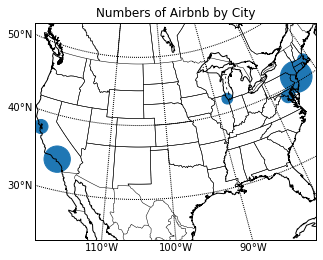

<Figure size 1500x1500 with 0 Axes>

In [177]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm


map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)


map.drawmapboundary()   
#map.fillcontinents()   
map.drawstates()        
map.drawcoastlines()    
map.drawcountries()     
#map.drawcounties()      

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 绘制经线


## 原始数据有3228组数据，我只选择了180个城市的数据
lat = np.array(data_by_city["latitude"])                        # 获取维度之维度值
lon = np.array(data_by_city["longitude"])                        # 获取经度值
pop = np.array(data_by_city["bnb"],dtype=float)    # 获取人口数，转化为numpy浮点型

size=(pop/np.max(pop))*1000     # 绘制散点图时图形的大小，如果之前pop不转换为浮点型会没有大小不一的效果
x,y = map(lon,lat)

# plt.text(x, y, 'Lagos',fontsize=12,fontweight='bold',
#                     ha='left',va='bottom',color='k')
# 
# 
# x, y = map(lon[0], lat[0])
# 
# plt.text(x, y, 'Barcelona',fontsize=12,fontweight='bold',
#                     ha='left',va='center',color='k',
#                     bbox=dict(facecolor='b', alpha=0.2))
#                     

# plt.scatter(x,y,s=size,cmap=cm.hsv,edgecolors=None,facecolors='c')

# plt.scatter(x,y,s=size,cmap=cm.hsv) # 使用matplotlib的散点图绘制函数
map.scatter(x,y,s=size)     # 也可以使用Basemap的methord本身的scatter
plt.title('Numbers of Airbnb by City')
plt.figure(figsize=(15,15),dpi=100)
plt.show()


In [153]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('/Users/guanlxy/Desktop/us_map.png', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in data_by_city:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

OSError: cannot locate /Users/guanlxy/Desktop/us_map.png.shp